In [725]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [796]:
happy_df = pd.read_csv('Resources/happiness rankings.csv')
pop_density_df = pd.read_csv('Resources/population density.csv')
migration_df = pd.read_csv('Resources/migration.csv')

In [797]:
happy_df.head()

Overall Rank              City State             Combine  Total Score
0             1             Plano    TX             PlanoTX        72.30
1             2            Irvine    CA            IrvineCA        71.86
2             3           Madison    WI           MadisonWI        71.81
3             4           Fremont    CA           FremontCA        71.17
4             5  Huntington Beach    CA  Huntington BeachCA        69.74

In [728]:
pop_density_df.head()

City  Density  Population square miles
0       Abilene, Texas     1145      122225          107
1          Akron, Ohio     3186      197633           62
2  Alameda, California     7437       78906           11
3      Albany, Georgia     1339       73801           55
4     Albany, New York     4587       98111           21

In [729]:
# Cleanup of pop_density_df

dens_split = pop_density_df['City'].str.split(",", n=1, expand = True)
dens_split.head()



0            1
0  Abilene        Texas
1    Akron         Ohio
2  Alameda   California
3   Albany      Georgia
4   Albany     New York

In [730]:
# Rename columns & add state abbreviation column
pop_density_df['City'] =  dens_split[0]
pop_density_df['StateL'] = dens_split[1]
pop_density_df['State'] = ""
pop_density_df.head()


City  Density  Population square miles       StateL State
0  Abilene     1145      122225          107        Texas      
1    Akron     3186      197633           62         Ohio      
2  Alameda     7437       78906           11   California      
3   Albany     1339       73801           55      Georgia      
4   Albany     4587       98111           21     New York

In [731]:
#Create State abbrv.

pop_density_df.loc[pop_density_df['StateL'] == ' Alabama', 'State'] = 'AL'
pop_density_df.loc[pop_density_df['StateL'] == ' Alaska', 'State'] = 'AK'
pop_density_df.loc[pop_density_df['StateL'] == ' Arizona', 'State'] = 'AZ'
pop_density_df.loc[pop_density_df['StateL'] == ' Arkansas', 'State'] = 'AR'
pop_density_df.loc[pop_density_df['StateL'] == ' California', 'State'] = 'CA'
pop_density_df.loc[pop_density_df['StateL'] == ' Colorado', 'State'] = 'CO'
pop_density_df.loc[pop_density_df['StateL'] == ' Connecticut', 'State'] = 'CT'
pop_density_df.loc[pop_density_df['StateL'] == ' Delaware', 'State'] = 'DE'
pop_density_df.loc[pop_density_df['StateL'] == ' Florida', 'State'] = 'FL'
pop_density_df.loc[pop_density_df['StateL'] == ' Georgia', 'State'] = 'GA'
pop_density_df.loc[pop_density_df['StateL'] == ' Hawaii', 'State'] = 'HI'
pop_density_df.loc[pop_density_df['StateL'] == ' Idaho', 'State'] = 'ID'
pop_density_df.loc[pop_density_df['StateL'] == ' Illinois', 'State'] = 'IL'
pop_density_df.loc[pop_density_df['StateL'] == ' Indiana', 'State'] = 'IN'
pop_density_df.loc[pop_density_df['StateL'] == ' Iowa', 'State'] = 'IA'
pop_density_df.loc[pop_density_df['StateL'] == ' Kansas', 'State'] = 'KS'
pop_density_df.loc[pop_density_df['StateL'] == ' Louisiana', 'State'] = 'LA'
pop_density_df.loc[pop_density_df['StateL'] == ' Kentucky', 'State'] = 'KY'
pop_density_df.loc[pop_density_df['StateL'] == ' Maine', 'State'] = 'ME'
pop_density_df.loc[pop_density_df['StateL'] == ' Maryland', 'State'] = 'MD'
pop_density_df.loc[pop_density_df['StateL'] == ' Massachusetts', 'State'] = 'MA'
pop_density_df.loc[pop_density_df['StateL'] == ' Michigan', 'State'] = 'MI'
pop_density_df.loc[pop_density_df['StateL'] == ' Minnesota', 'State'] = 'MN'
pop_density_df.loc[pop_density_df['StateL'] == ' Mississippi', 'State'] = 'MS'
pop_density_df.loc[pop_density_df['StateL'] == ' Missouri', 'State'] = 'MO'
pop_density_df.loc[pop_density_df['StateL'] == ' Montana', 'State'] = 'MT'
pop_density_df.loc[pop_density_df['StateL'] == ' Nebraska', 'State'] = 'NE'
pop_density_df.loc[pop_density_df['StateL'] == ' Nevada', 'State'] = 'NV'
pop_density_df.loc[pop_density_df['StateL'] == ' New Hampshire', 'State'] = 'NH'
pop_density_df.loc[pop_density_df['StateL'] == ' New Jersey', 'State'] = 'NJ'
pop_density_df.loc[pop_density_df['StateL'] == ' New Mexico', 'State'] = 'NM'
pop_density_df.loc[pop_density_df['StateL'] == ' New York', 'State'] = 'NY'
pop_density_df.loc[pop_density_df['StateL'] == ' North Carolina', 'State'] = 'NC'
pop_density_df.loc[pop_density_df['StateL'] == ' North Dakota', 'State'] = 'ND'
pop_density_df.loc[pop_density_df['StateL'] == ' Ohio', 'State'] = 'OH'
pop_density_df.loc[pop_density_df['StateL'] == ' Oklahoma', 'State'] = 'OK'
pop_density_df.loc[pop_density_df['StateL'] == ' Oregon', 'State'] = 'OR'
pop_density_df.loc[pop_density_df['StateL'] == ' Pennsylvania', 'State'] = 'PA'
pop_density_df.loc[pop_density_df['StateL'] == ' Rhode Island', 'State'] = 'RI'
pop_density_df.loc[pop_density_df['StateL'] == ' South Carolina', 'State'] = 'SC'
pop_density_df.loc[pop_density_df['StateL'] == ' South Dakota', 'State'] = 'SD'
pop_density_df.loc[pop_density_df['StateL'] == ' Tennessee', 'State'] = 'TN'
pop_density_df.loc[pop_density_df['StateL'] == ' Texas', 'State'] = 'TX'
pop_density_df.loc[pop_density_df['StateL'] == ' Utah', 'State'] = 'UT'
pop_density_df.loc[pop_density_df['StateL'] == ' Vermont', 'State'] = 'VT'
pop_density_df.loc[pop_density_df['StateL'] == ' Virginia', 'State'] = 'VA'
pop_density_df.loc[pop_density_df['StateL'] == ' Washington', 'State'] = 'WA'
pop_density_df.loc[pop_density_df['StateL'] == ' West Virginia', 'State'] = 'WV'
pop_density_df.loc[pop_density_df['StateL'] == ' Wisconsin', 'State'] = 'WI'
pop_density_df.loc[pop_density_df['StateL'] == ' Wyoming', 'State'] = 'WY'
pop_density_df.loc[pop_density_df['StateL'] == ' District of Columbia', 'State'] = 'DC'





pop_density_df.head()

City  Density  Population square miles       StateL State
0  Abilene     1145      122225          107        Texas    TX
1    Akron     3186      197633           62         Ohio    OH
2  Alameda     7437       78906           11   California    CA
3   Albany     1339       73801           55      Georgia    GA
4   Albany     4587       98111           21     New York    NY

In [732]:
#create Keys for merging
pop_density_df["Combine"] = pop_density_df['City'].str.cat(pop_density_df['State'])


In [733]:
pop_density_df.head()

City  Density  Population square miles       StateL State    Combine
0  Abilene     1145      122225          107        Texas    TX  AbileneTX
1    Akron     3186      197633           62         Ohio    OH    AkronOH
2  Alameda     7437       78906           11   California    CA  AlamedaCA
3   Albany     1339       73801           55      Georgia    GA   AlbanyGA
4   Albany     4587       98111           21     New York    NY   AlbanyNY

In [734]:
####Merging the two files

happy_density_table = pd.merge(happy_df, pop_density_df, on="Combine", how="left") 
happy_density_table.head()


Overall Rank            City_x State_x             Combine  Total Score  \
0             1             Plano      TX             PlanoTX        72.30   
1             2            Irvine      CA            IrvineCA        71.86   
2             3           Madison      WI           MadisonWI        71.81   
3             4           Fremont      CA           FremontCA        71.17   
4             5  Huntington Beach      CA  Huntington BeachCA        69.74   

             City_y  Density  Population square miles       StateL State_y  
0             Plano     3996      286057           72        Texas      TX  
1            Irvine     4025      266122           66   California      CA  
2           Madison     3289      252551           77    Wisconsin      WI  
3           Fremont     3010      233136           77   California      CA  
4  Huntington Beach     7501      200652           27   California      CA

In [735]:
happy_density_table.to_csv('results/happydensity.csv')


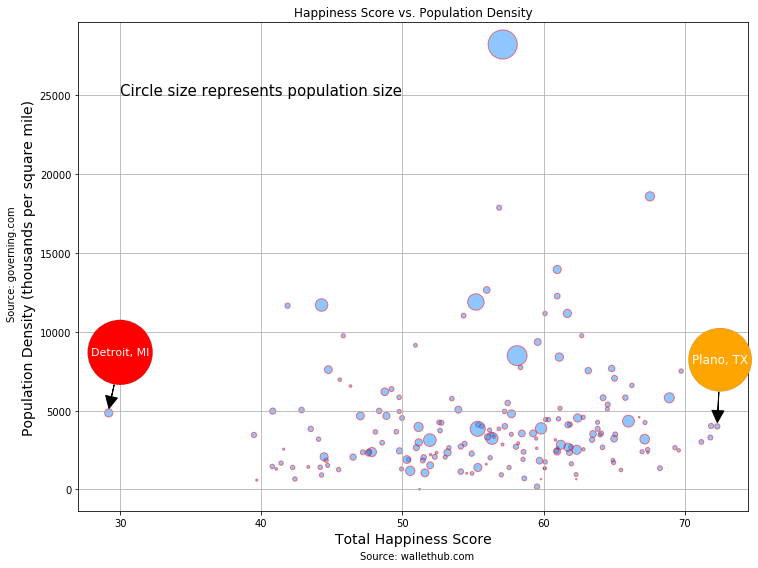

<Figure size 864x648 with 0 Axes>

In [736]:
#set Plotting variables
x = happy_density_table['Total Score']
y = happy_density_table['Density']
s = happy_density_table['Population']/10000
c = "dodgerblue"
edgecolors = 'red'

#size the graph
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

#add grid
plt.grid(True)
#Add Text
plt.title ('Happiness Score vs. Population Density')
plt.xlabel('Total Happiness Score', fontsize = 14)
plt.ylabel('Population Density (thousands per square mile)', fontsize = 14)
plt.text(30,25000,'Circle size represents population size', fontsize = 15)
plt.text(47,-4400,'Source: wallethub.com')
plt.text(22,17500, "Source: governing.com", rotation = 90)
#Showing most and least happy cities
#Happy
plt.annotate('Plano, TX', xy=(72.3, 4200), xytext=(72.5,8000),
             bbox=dict(boxstyle='circle', fc='orange', linewidth=0.1),
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')
#unhappy
plt.annotate('Detroit, MI', xy=(29.2,5100), xytext=(30,8500),
             bbox=dict(boxstyle='circle', fc='red', linewidth=0.1),
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1), 
             fontsize=11, color='white', horizontalalignment='center')

#plot graph
plt.scatter(x,y,s,c=c,edgecolors=edgecolors,alpha = 0.5)
plt.show()
plt.savefig('results/popdensity.png')

In [737]:
# Stats
happy_density_table['Group'] =''
happy_density_table.head()

Overall Rank            City_x State_x             Combine  Total Score  \
0             1             Plano      TX             PlanoTX        72.30   
1             2            Irvine      CA            IrvineCA        71.86   
2             3           Madison      WI           MadisonWI        71.81   
3             4           Fremont      CA           FremontCA        71.17   
4             5  Huntington Beach      CA  Huntington BeachCA        69.74   

             City_y  Density  Population square miles       StateL State_y  \
0             Plano     3996      286057           72        Texas      TX   
1            Irvine     4025      266122           66   California      CA   
2           Madison     3289      252551           77    Wisconsin      WI   
3           Fremont     3010      233136           77   California      CA   
4  Huntington Beach     7501      200652           27   California      CA   

  Group  
0        
1        
2        
3        
4

In [738]:
#create groupings for box plot and anova testing
happy_density_table['Group'] = ""
happy_density_table.iloc[0:11,-1] = 1
happy_density_table.iloc[11:21,-1] = 2
happy_density_table.iloc[21:31,-1] = 3
happy_density_table.iloc[31:41,-1] = 4
happy_density_table.iloc[41:51,-1] = 5
happy_density_table.iloc[51:61,-1] = 6
happy_density_table.iloc[61:71,-1] = 7
happy_density_table.iloc[71:81,-1] = 8
happy_density_table.iloc[81:91,-1] = 9
happy_density_table.iloc[91:101,-1] = 10
happy_density_table.iloc[101:111,-1] = 11
happy_density_table.iloc[111:121,-1] = 12
happy_density_table.iloc[121:131,-1] = 13
happy_density_table.iloc[131:141,-1] = 14
happy_density_table.iloc[141:151,-1] = 15
happy_density_table.iloc[151:161,-1] = 16
happy_density_table.iloc[161:171,-1] = 17
happy_density_table.iloc[171:183,-1] = 18


happy_density_table.head()

Overall Rank            City_x State_x             Combine  Total Score  \
0             1             Plano      TX             PlanoTX        72.30   
1             2            Irvine      CA            IrvineCA        71.86   
2             3           Madison      WI           MadisonWI        71.81   
3             4           Fremont      CA           FremontCA        71.17   
4             5  Huntington Beach      CA  Huntington BeachCA        69.74   

             City_y  Density  Population square miles       StateL State_y  \
0             Plano     3996      286057           72        Texas      TX   
1            Irvine     4025      266122           66   California      CA   
2           Madison     3289      252551           77    Wisconsin      WI   
3           Fremont     3010      233136           77   California      CA   
4  Huntington Beach     7501      200652           27   California      CA   

   Group  
0      1  
1      1  
2      1  
3      1  
4      1

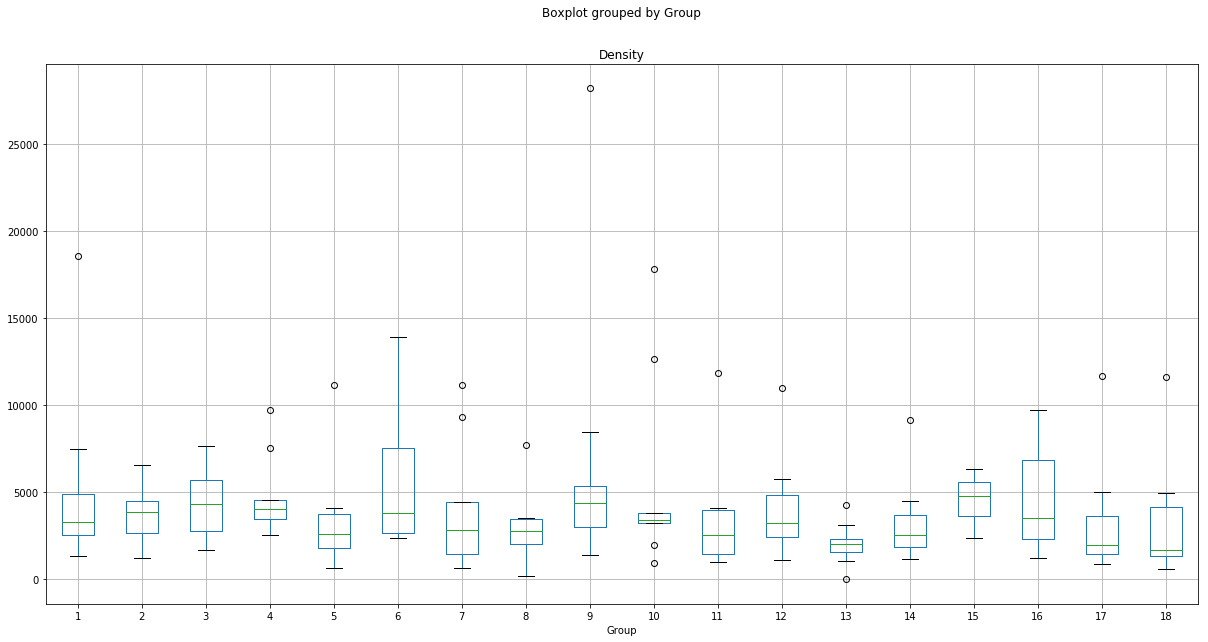

In [739]:
#Anova test 
happy_density_table.boxplot("Density", by="Group", figsize=(20, 10))
plt.savefig('results/boxplot.png')

In [740]:
#group creation
group1 = happy_density_table[happy_density_table["Group"] == 1]["Density"]
group2 = happy_density_table[happy_density_table["Group"] == 2]["Density"]
group3 = happy_density_table[happy_density_table["Group"] == 3]["Density"]
group4 = happy_density_table[happy_density_table["Group"] == 4]["Density"]
group5 = happy_density_table[happy_density_table["Group"] == 5]["Density"]
group6 = happy_density_table[happy_density_table["Group"] == 6]["Density"]
group7 = happy_density_table[happy_density_table["Group"] == 7]["Density"]
group8 = happy_density_table[happy_density_table["Group"] == 8]["Density"]
group9 = happy_density_table[happy_density_table["Group"] == 9]["Density"]
group10 = happy_density_table[happy_density_table["Group"] == 10]["Density"]
group11 = happy_density_table[happy_density_table["Group"] == 11]["Density"]
group12 = happy_density_table[happy_density_table["Group"] == 12]["Density"]
group13 = happy_density_table[happy_density_table["Group"] == 13]["Density"]
group14 = happy_density_table[happy_density_table["Group"] == 14]["Density"]
group15 = happy_density_table[happy_density_table["Group"] == 15]["Density"]
group16 = happy_density_table[happy_density_table["Group"] == 16]["Density"]
group17 = happy_density_table[happy_density_table["Group"] == 17]["Density"]
group18 = happy_density_table[happy_density_table["Group"] == 18]["Density"]

In [741]:
#ANOVA Test
stats.f_oneway(group1, group2, group3, group4, group5,group6,group7,group8,group9,group10,group11,group12,group13,
               group14,group15,group16,group17,group18)


F_onewayResult(statistic=1.0373159174965505, pvalue=0.42091575267505493)

In [742]:

migration_df.head()

city - Original        City State - Long State    2010    2011    2012  \
0  Birmingham city  Birmingham      Alabama    AL  211739  211516  210660   
1  Montgomery city  Montgomery      Alabama    AL  205616  205193  203814   
2  Huntsville city  Huntsville      Alabama    AL  180924  182122  183463   
3      Mobile city      Mobile      Alabama    AL  194582  193989  193776   
4  Tuscaloosa city  Tuscaloosa      Alabama    AL   90537   91408   92649   

     2013    2014    2015    2016    2017  
0  211094  210998  211621  211263  210710  
1  202226  201243  200798  200066  199518  
2  185662  187506  189975  191956  194585  
3  193429  192856  192223  191590  190265  
4   94148   95941   97795   98767  100287

In [743]:
migration_df['Combine'] = migration_df['City'].str.cat(migration_df['State'])
pop_density_df["Combine"] = pop_density_df['City'].str.cat(pop_density_df['State'])
migration_df.head()

city - Original        City State - Long State    2010    2011    2012  \
0  Birmingham city  Birmingham      Alabama    AL  211739  211516  210660   
1  Montgomery city  Montgomery      Alabama    AL  205616  205193  203814   
2  Huntsville city  Huntsville      Alabama    AL  180924  182122  183463   
3      Mobile city      Mobile      Alabama    AL  194582  193989  193776   
4  Tuscaloosa city  Tuscaloosa      Alabama    AL   90537   91408   92649   

     2013    2014    2015    2016    2017       Combine  
0  211094  210998  211621  211263  210710  BirminghamAL  
1  202226  201243  200798  200066  199518  MontgomeryAL  
2  185662  187506  189975  191956  194585  HuntsvilleAL  
3  193429  192856  192223  191590  190265      MobileAL  
4   94148   95941   97795   98767  100287  TuscaloosaAL

In [744]:
pop_df = pd.merge(happy_df, migration_df, on = "Combine", how = 'left')
# sorted_pop_df = pop_df.sort_values(by=['Overall Rank'], inplace=True)
# sorted_pop_df
pop_df

Overall Rank            City_x State_x             Combine  Total Score  \
0               1             Plano      TX             PlanoTX        72.30   
1               2            Irvine      CA            IrvineCA        71.86   
2               3           Madison      WI           MadisonWI        71.81   
3               4           Fremont      CA           FremontCA        71.17   
4               5  Huntington Beach      CA  Huntington BeachCA        69.74   
5               6             Fargo      ND             FargoND        69.57   
6               7     Grand Prairie      TX     Grand PrairieTX        69.30   
7               8          San Jose      CA          San JoseCA        68.90   
8               9        Scottsdale      AZ        ScottsdaleAZ        68.24   
9              10     San Francisco      CA     San FranciscoCA        67.53   
10             11          Bismarck      ND          BismarckND        67.38   
11             12     Overland Park      KS     Overland ParkKS        67.37   
12             13        Santa Rosa      CA        Santa RosaCA        67.18   
13             14            Austin      TX            AustinTX        67.16   
14             15       Sioux Falls      SD       Sioux FallsSD        66.97   
15             16        Pearl City      HI        Pearl CityHI        66.77   
16             17          Glendale      CA          GlendaleCA        66.25   
17             18         San Diego      CA         San DiegoCA        66.01   
18             19          St. Paul      MN          St. PaulMN        65.79   
19             20        Charleston      SC        CharlestonSC        65.48   
20             21           Gilbert      AZ           GilbertAZ        65.07   
21             22           Anaheim      CA           AnaheimCA        65.02   
22             23           Raleigh      NC           RaleighNC        64.99   
23             24        Cape Coral      FL        Cape CoralFL        64.96   
24             25      Cedar Rapids      IA      Cedar RapidsIA        64.90   
25             26       Minneapolis      MN       MinneapolisMN        64.82   
26             27       Chula Vista      CA       Chula VistaCA        64.54   
27             28    Pembroke Pines      FL    Pembroke PinesFL        64.51   
28             29          Honolulu      HI          HonoluluHI        64.21   
29             30        Des Moines      IA        Des MoinesIA        64.17   
..            ...               ...     ...                 ...          ...   
152           153       New Orleans      LA       New OrleansLA        47.57   
153           154   North Las Vegas      NV   North Las VegasNV        47.19   
154           155         Las Vegas      NV         Las VegasNV        47.02   
155           156             Tulsa      OK             TulsaOK        46.50   
156           157        Wilmington      DE        WilmingtonDE        46.32   
157           158        Providence      RI        ProvidenceRI        45.81   
158           159         New Haven      CT         New HavenCT        45.56   
159           160        Montgomery      AL        MontgomeryAL        45.48   
160           161         Baltimore      MD         BaltimoreMD        44.75   
161           162           Jackson      MS           JacksonMS        44.70   
162           163        Shreveport      LA        ShreveportLA        44.59   
163           164           Memphis      TN           MemphisTN        44.45   
164           165      Philadelphia      PA      PhiladelphiaPA        44.27   
165           166          Columbus      GA          ColumbusGA        44.27   
166           167      Fayetteville      NC      FayettevilleNC        44.17   
167           168             Akron      OH             AkronOH        44.05   
168           169        Cincinnati      OH        CincinnatiOH        43.50   
169           170        Fort Smith      AR        Fort SmithAR        43.33   
170  

In [745]:
top_df = pop_df.head(10)
top_df

Overall Rank            City_x State_x             Combine  Total Score  \
0             1             Plano      TX             PlanoTX        72.30   
1             2            Irvine      CA            IrvineCA        71.86   
2             3           Madison      WI           MadisonWI        71.81   
3             4           Fremont      CA           FremontCA        71.17   
4             5  Huntington Beach      CA  Huntington BeachCA        69.74   
5             6             Fargo      ND             FargoND        69.57   
6             7     Grand Prairie      TX     Grand PrairieTX        69.30   
7             8          San Jose      CA          San JoseCA        68.90   
8             9        Scottsdale      AZ        ScottsdaleAZ        68.24   
9            10     San Francisco      CA     San FranciscoCA        67.53   

         city - Original            City_y   State - Long State_y      2010  \
0             Plano city             Plano          Texas      TX  261236.0   
1            Irvine city            Irvine     California      CA  213435.0   
2           Madison city           Madison      Wisconsin      WI  233637.0   
3           Fremont city           Fremont     California      CA  214619.0   
4  Huntington Beach city  Huntington Beach     California      CA  191342.0   
5             Fargo city             Fargo   North Dakota      ND  105935.0   
6     Grand Prairie city     Grand Prairie          Texas      TX  175970.0   
7          San Jose city          San Jose     California      CA  955255.0   
8        Scottsdale city        Scottsdale        Arizona      AZ  217550.0   
9     San Francisco city     San Francisco     California      CA  805770.0   

       2011      2012       2013       2014       2015       2016       2017  
0  267175.0  272414.0   274771.0   277914.0   283006.0   286132.0   286143.0  
1  220454.0  229456.0   236574.0   247804.0   256186.0   266385.0   277453.0  
2  236881.0  239904.0   243046.0   245584.0   248269.0   252107.0   255214.0  
3  217580.0  221847.0   225282.0   228820.0   232061.0   233801.0   234962.0  
4  193184.0  194563.0   197588.0   200188.0   201300.0   201004.0   201874.0  
5  107703.0  110237.0   113817.0   115803.0   118147.0   120356.0   122359.0  
6  178859.0  181982.0   183891.0   185718.0   188197.0   191874.0   193837.0  
7  971352.0  985722.0  1003735.0  1016708.0  1027560.0  1031942.0  1035317.0  
8  220383.0  224587.0   227993.0   232683.0   239649.0   246204.0   249950.0  
9  816294.0  830406.0   841270.0   853258.0   866320.0   876103.0   884363.0

In [746]:
bottom_df = pop_df.tail(10)
bottom_df

Overall Rank       City_x State_x        Combine  Total Score  \
172           173       Mobile      AL       MobileAL        42.22   
173           174       Newark      NJ       NewarkNJ        41.86   
174           175   Huntington      WV   HuntingtonWV        41.58   
175           176  Little Rock      AR  Little RockAR        41.40   
176           177     Gulfport      MS     GulfportMS        41.06   
177           178    Cleveland      OH    ClevelandOH        40.81   
178           179   Birmingham      AL   BirminghamAL        40.78   
179           180   Charleston      WV   CharlestonWV        39.68   
180           181       Toledo      OH       ToledoOH        39.48   
181           182      Detroit      MI      DetroitMI        29.19   

      city - Original       City_y    State - Long State_y      2010  \
172       Mobile city       Mobile         Alabama      AL  194582.0   
173       Newark city       Newark      New Jersey      NJ  277332.0   
174        Huntington   Huntington   West Virginia      WV   49176.0   
175  Little Rock city  Little Rock        Arkansas      AR  193899.0   
176     Gulfport city     Gulfport     Mississippi      MS   67897.0   
177    Cleveland city    Cleveland            Ohio      OH  395978.0   
178   Birmingham city   Birmingham         Alabama      AL  211739.0   
179   Charleston city   Charleston   West Virginia      WV   51277.0   
180       Toledo city       Toledo            Ohio      OH  286994.0   
181      Detroit city      Detroit        Michigan      MI  711043.0   

         2011      2012      2013      2014      2015      2016      2017  
172  193989.0  193776.0  193429.0  192856.0  192223.0  191590.0  190265.0  
173  278078.0  278790.0  280005.0  281660.0  282854.0  284386.0  285154.0  
174   49097.0   49095.0   48833.0   48478.0   48169.0   47602.0   47079.0  
175  195048.0  196228.0  196830.0  197235.0  197864.0  198307.0  198606.0  
176   68810.0   69740.0   70759.0   71109.0   71262.0   71523.0   71822.0  
177  392723.0  391596.0  391555.0  390653.0  389009.0  387451.0  385525.0  
178  211516.0  210660.0  211094.0  210998.0  211621.0  211263.0  210710.0  
179   50970.0   50838.0   50635.0   50109.0   49431.0   48769.0   47929.0  
180  285303.0  283062.0  282106.0  280500.0  279613.0  278606.0  276491.0  
181  704640.0  699385.0  690845.0  681499.0  678250.0  675480.0  673104.0

In [747]:
combined = [top_df, bottom_df]
top_bottom = pd.concat(combined)
top_bottom.to_csv('topbottom.csv')
top_bottom.head()

Overall Rank            City_x State_x             Combine  Total Score  \
0             1             Plano      TX             PlanoTX        72.30   
1             2            Irvine      CA            IrvineCA        71.86   
2             3           Madison      WI           MadisonWI        71.81   
3             4           Fremont      CA           FremontCA        71.17   
4             5  Huntington Beach      CA  Huntington BeachCA        69.74   

         city - Original            City_y State - Long State_y      2010  \
0             Plano city             Plano        Texas      TX  261236.0   
1            Irvine city            Irvine   California      CA  213435.0   
2           Madison city           Madison    Wisconsin      WI  233637.0   
3           Fremont city           Fremont   California      CA  214619.0   
4  Huntington Beach city  Huntington Beach   California      CA  191342.0   

       2011      2012      2013      2014      2015      2016      2017  
0  267175.0  272414.0  274771.0  277914.0  283006.0  286132.0  286143.0  
1  220454.0  229456.0  236574.0  247804.0  256186.0  266385.0  277453.0  
2  236881.0  239904.0  243046.0  245584.0  248269.0  252107.0  255214.0  
3  217580.0  221847.0  225282.0  228820.0  232061.0  233801.0  234962.0  
4  193184.0  194563.0  197588.0  200188.0  201300.0  201004.0  201874.0

In [748]:
#Cleanup
del top_bottom['State_y']
del top_bottom['City_y']
del top_bottom['city - Original']
del top_bottom['State - Long']
del top_bottom['Total Score']
del top_bottom['Combine']
del top_bottom['State_x']
del top_bottom['Overall Rank']
top_bottom.rename(columns={'City_x':'City'}, inplace = True)
#gapminder.rename(columns={'pop':'population'}, inplace=True)
top_bottom


City      2010      2011      2012       2013       2014  \
0               Plano  261236.0  267175.0  272414.0   274771.0   277914.0   
1              Irvine  213435.0  220454.0  229456.0   236574.0   247804.0   
2             Madison  233637.0  236881.0  239904.0   243046.0   245584.0   
3             Fremont  214619.0  217580.0  221847.0   225282.0   228820.0   
4    Huntington Beach  191342.0  193184.0  194563.0   197588.0   200188.0   
5               Fargo  105935.0  107703.0  110237.0   113817.0   115803.0   
6       Grand Prairie  175970.0  178859.0  181982.0   183891.0   185718.0   
7            San Jose  955255.0  971352.0  985722.0  1003735.0  1016708.0   
8          Scottsdale  217550.0  220383.0  224587.0   227993.0   232683.0   
9       San Francisco  805770.0  816294.0  830406.0   841270.0   853258.0   
172            Mobile  194582.0  193989.0  193776.0   193429.0   192856.0   
173            Newark  277332.0  278078.0  278790.0   280005.0   281660.0   
174        Huntington   49176.0   49097.0   49095.0    48833.0    48478.0   
175       Little Rock  193899.0  195048.0  196228.0   196830.0   197235.0   
176          Gulfport   67897.0   68810.0   69740.0    70759.0    71109.0   
177         Cleveland  395978.0  392723.0  391596.0   391555.0   390653.0   
178        Birmingham  211739.0  211516.0  210660.0   211094.0   210998.0   
179        Charleston   51277.0   50970.0   50838.0    50635.0    50109.0   
180            Toledo  286994.0  285303.0  283062.0   282106.0   280500.0   
181           Detroit  711043.0  704640.0  699385.0   690845.0   681499.0   

          2015       2016       2017  
0     283006.0   286132.0   286143.0  
1     256186.0   266385.0   277453.0  
2     248269.0   252107.0   255214.0  
3     232061.0   233801.0   234962.0  
4     201300.0   201004.0   201874.0  
5     118147.0   120356.0   122359.0  
6     188197.0   191874.0   193837.0  
7    1027560.0  1031942.0  1035317.0  
8     239649.0   246204.0   249950.0  
9     866320.0   876103.0   884363.0  
172   192223.0   191590.0   190265.0  
173   282854.0   284386.0   285154.0  
174    48169.0    47602.0    47079.0  
175   197864.0   198307.0   198606.0  
176    71262.0    71523.0    71822.0  
177   389009.0   387451.0   385525.0  
178   211621.0   211263.0   210710.0  
179    49431.0    48769.0    47929.0  
180   279613.0   278606.0   276491.0  
181   678250.0   675480.0   673104.0

In [757]:
top_bottom.set_index('City', inplace = True)
top_bottom

2010      2011      2012       2013       2014  \
City                                                                   
Plano             261236.0  267175.0  272414.0   274771.0   277914.0   
Irvine            213435.0  220454.0  229456.0   236574.0   247804.0   
Madison           233637.0  236881.0  239904.0   243046.0   245584.0   
Fremont           214619.0  217580.0  221847.0   225282.0   228820.0   
Huntington Beach  191342.0  193184.0  194563.0   197588.0   200188.0   
Fargo             105935.0  107703.0  110237.0   113817.0   115803.0   
Grand Prairie     175970.0  178859.0  181982.0   183891.0   185718.0   
San Jose          955255.0  971352.0  985722.0  1003735.0  1016708.0   
Scottsdale        217550.0  220383.0  224587.0   227993.0   232683.0   
San Francisco     805770.0  816294.0  830406.0   841270.0   853258.0   
Mobile            194582.0  193989.0  193776.0   193429.0   192856.0   
Newark            277332.0  278078.0  278790.0   280005.0   281660.0   
Huntington         49176.0   49097.0   49095.0    48833.0    48478.0   
Little Rock       193899.0  195048.0  196228.0   196830.0   197235.0   
Gulfport           67897.0   68810.0   69740.0    70759.0    71109.0   
Cleveland         395978.0  392723.0  391596.0   391555.0   390653.0   
Birmingham        211739.0  211516.0  210660.0   211094.0   210998.0   
Charleston         51277.0   50970.0   50838.0    50635.0    50109.0   
Toledo            286994.0  285303.0  283062.0   282106.0   280500.0   
Detroit           711043.0  704640.0  699385.0   690845.0   681499.0   

                       2015       2016       2017  
City                                               
Plano              283006.0   286132.0   286143.0  
Irvine             256186.0   266385.0   277453.0  
Madison            248269.0   252107.0   255214.0  
Fremont            232061.0   233801.0   234962.0  
Huntington Beach   201300.0   201004.0   201874.0  
Fargo              118147.0   120356.0   122359.0  
Grand Prairie      188197.0   191874.0   193837.0  
San Jose          1027560.0  1031942.0  1035317.0  
Scottsdale         239649.0   246204.0   249950.0  
San Francisco      866320.0   876103.0   884363.0  
Mobile             192223.0   191590.0   190265.0  
Newark             282854.0   284386.0   285154.0  
Huntington          48169.0    47602.0    47079.0  
Little Rock        197864.0   198307.0   198606.0  
Gulfport            71262.0    71523.0    71822.0  
Cleveland          389009.0   387451.0   385525.0  
Birmingham         211621.0   211263.0   210710.0  
Charleston          49431.0    48769.0    47929.0  
Toledo             279613.0   278606.0   276491.0  
Detroit            678250.0   675480.0   673104.0

In [798]:
top_bottom.to_csv('results/topbottom.csv')
trans_top_bottom = top_bottom.T
trans_top_bottom

City     Plano    Irvine   Madison   Fremont  Huntington Beach     Fargo  \
2010  261236.0  213435.0  233637.0  214619.0          191342.0  105935.0   
2011  267175.0  220454.0  236881.0  217580.0          193184.0  107703.0   
2012  272414.0  229456.0  239904.0  221847.0          194563.0  110237.0   
2013  274771.0  236574.0  243046.0  225282.0          197588.0  113817.0   
2014  277914.0  247804.0  245584.0  228820.0          200188.0  115803.0   
2015  283006.0  256186.0  248269.0  232061.0          201300.0  118147.0   
2016  286132.0  266385.0  252107.0  233801.0          201004.0  120356.0   
2017  286143.0  277453.0  255214.0  234962.0          201874.0  122359.0   

City  Grand Prairie   San Jose  Scottsdale  San Francisco    Mobile    Newark  \
2010       175970.0   955255.0    217550.0       805770.0  194582.0  277332.0   
2011       178859.0   971352.0    220383.0       816294.0  193989.0  278078.0   
2012       181982.0   985722.0    224587.0       830406.0  193776.0  278790.0   
2013       183891.0  1003735.0    227993.0       841270.0  193429.0  280005.0   
2014       185718.0  1016708.0    232683.0       853258.0  192856.0  281660.0   
2015       188197.0  1027560.0    239649.0       866320.0  192223.0  282854.0   
2016       191874.0  1031942.0    246204.0       876103.0  191590.0  284386.0   
2017       193837.0  1035317.0    249950.0       884363.0  190265.0  285154.0   

City  Huntington  Little Rock  Gulfport  Cleveland  Birmingham  Charleston  \
2010     49176.0     193899.0   67897.0   395978.0    211739.0     51277.0   
2011     49097.0     195048.0   68810.0   392723.0    211516.0     50970.0   
2012     49095.0     196228.0   69740.0   391596.0    210660.0     50838.0   
2013     48833.0     196830.0   70759.0   391555.0    211094.0     50635.0   
2014     48478.0     197235.0   71109.0   390653.0    210998.0     50109.0   
2015     48169.0     197864.0   71262.0   389009.0    211621.0     49431.0   
2016     47602.0     198307.0   71523.0   387451.0    211263.0     48769.0   
2017     47079.0     198606.0   71822.0   385525.0    210710.0     47929.0   

City    Toledo   Detroit  
2010  286994.0  711043.0  
2011  285303.0  704640.0  
2012  283062.0  699385.0  
2013  282106.0  690845.0  
2014  280500.0  681499.0  
2015  279613.0  678250.0  
2016  278606.0  675480.0  
2017  276491.0  673104.0

In [768]:
trans_top_bottom.reset_index(inplace = True) 
trans_top_bottom.to_csv('results/transtopbottom.csv')
trans_top_bottom

City index     Plano    Irvine   Madison   Fremont  Huntington Beach  \
0     2010  261236.0  213435.0  233637.0  214619.0          191342.0   
1     2011  267175.0  220454.0  236881.0  217580.0          193184.0   
2     2012  272414.0  229456.0  239904.0  221847.0          194563.0   
3     2013  274771.0  236574.0  243046.0  225282.0          197588.0   
4     2014  277914.0  247804.0  245584.0  228820.0          200188.0   
5     2015  283006.0  256186.0  248269.0  232061.0          201300.0   
6     2016  286132.0  266385.0  252107.0  233801.0          201004.0   
7     2017  286143.0  277453.0  255214.0  234962.0          201874.0   

City     Fargo  Grand Prairie   San Jose  Scottsdale  ...    Mobile    Newark  \
0     105935.0       175970.0   955255.0    217550.0  ...  194582.0  277332.0   
1     107703.0       178859.0   971352.0    220383.0  ...  193989.0  278078.0   
2     110237.0       181982.0   985722.0    224587.0  ...  193776.0  278790.0   
3     113817.0       183891.0  1003735.0    227993.0  ...  193429.0  280005.0   
4     115803.0       185718.0  1016708.0    232683.0  ...  192856.0  281660.0   
5     118147.0       188197.0  1027560.0    239649.0  ...  192223.0  282854.0   
6     120356.0       191874.0  1031942.0    246204.0  ...  191590.0  284386.0   
7     122359.0       193837.0  1035317.0    249950.0  ...  190265.0  285154.0   

City  Huntington  Little Rock  Gulfport  Cleveland  Birmingham  Charleston  \
0        49176.0     193899.0   67897.0   395978.0    211739.0     51277.0   
1        49097.0     195048.0   68810.0   392723.0    211516.0     50970.0   
2        49095.0     196228.0   69740.0   391596.0    210660.0     50838.0   
3        48833.0     196830.0   70759.0   391555.0    211094.0     50635.0   
4        48478.0     197235.0   71109.0   390653.0    210998.0     50109.0   
5        48169.0     197864.0   71262.0   389009.0    211621.0     49431.0   
6        47602.0     198307.0   71523.0   387451.0    211263.0     48769.0   
7        47079.0     198606.0   71822.0   385525.0    210710.0     47929.0   

City    Toledo   Detroit  
0     286994.0  711043.0  
1     285303.0  704640.0  
2     283062.0  699385.0  
3     282106.0  690845.0  
4     280500.0  681499.0  
5     279613.0  678250.0  
6     278606.0  675480.0  
7     276491.0  673104.0  

[8 rows x 21 columns]

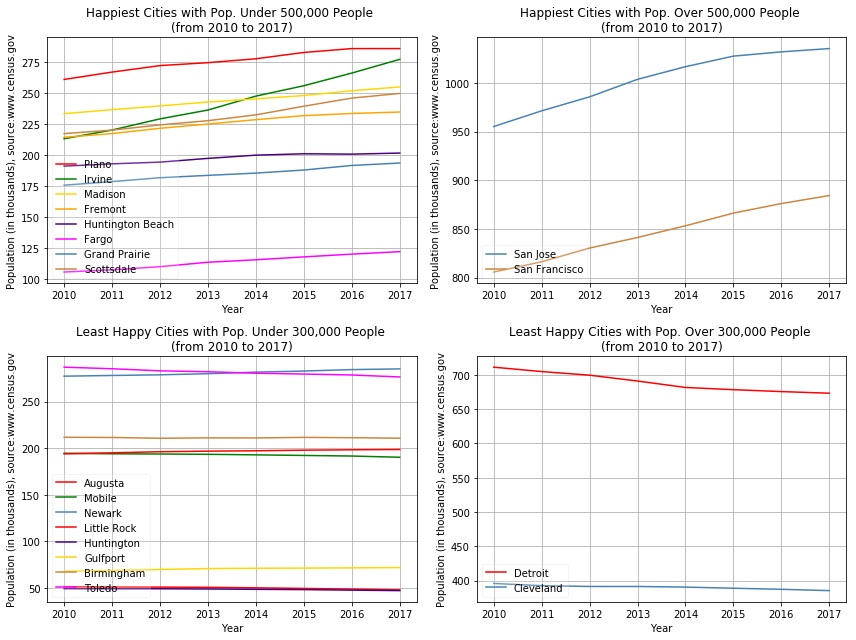

In [793]:
plt.subplot (2,2,1)
plt.plot(trans_top_bottom['index'], trans_top_bottom['Plano']/1000, c = 'red', label = 'Plano')
plt.plot(trans_top_bottom['index'], trans_top_bottom['Irvine']/1000, c = 'green', label = 'Irvine')
plt.plot(trans_top_bottom['index'], trans_top_bottom['Madison']/1000, c= 'gold', label = 'Madison')
plt.plot(trans_top_bottom['index'], trans_top_bottom['Fremont']/1000, c = 'orange', label = 'Fremont')
plt.plot(trans_top_bottom['index'], trans_top_bottom['Huntington Beach']/1000, c = 'indigo', label = 'Huntington Beach')
plt.plot(trans_top_bottom['index'], trans_top_bottom['Fargo']/1000, c = 'magenta', label = 'Fargo')
plt.plot(trans_top_bottom['index'], trans_top_bottom['Grand Prairie']/1000, c = 'steelblue', label = 'Grand Prairie')
plt.plot(trans_top_bottom['index'], trans_top_bottom['Scottsdale']/1000, c = 'peru', label = 'Scottsdale')
plt.title(f'''Happiest Cities with Pop. Under 500,000 People 
(from 2010 to 2017)''')
plt.grid()
leg = plt.legend(loc = 3,ncol = 1) 
leg.get_frame().set_alpha(0.2)
plt.xlabel('Year')
plt.ylabel('Population (in thousands), source:www.census.gov')


plt.subplot(2,2,2)
plt.plot(trans_top_bottom['index'], trans_top_bottom['San Jose']/1000, c = 'steelblue', label = 'San Jose')
plt.plot(trans_top_bottom['index'], trans_top_bottom['San Francisco']/1000, c = 'peru', label = 'San Francisco')
plt.title(f'''Happiest Cities with Pop. Over 500,000 People 
(from 2010 to 2017)''')
leg = plt.legend(loc = 3,ncol = 1) 
leg.get_frame().set_alpha(0.2)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Population (in thousands), source:www.census.gov')



plt.subplot(2,2,3)
plt.plot(trans_top_bottom['index'], trans_top_bottom['Charleston']/1000, c = 'red', label = 'Augusta')
plt.plot(trans_top_bottom['index'], trans_top_bottom['Mobile']/1000, c = 'green', label = 'Mobile')
plt.plot(trans_top_bottom['index'], trans_top_bottom['Newark']/1000, c= 'steelblue', label = 'Newark')
plt.plot(trans_top_bottom['index'], trans_top_bottom['Little Rock']/1000, c = 'red', label = 'Little Rock')
plt.plot(trans_top_bottom['index'], trans_top_bottom['Huntington']/1000, c = 'indigo', label = 'Huntington')
plt.plot(trans_top_bottom['index'], trans_top_bottom['Gulfport']/1000, c = 'gold', label = 'Gulfport')
plt.plot(trans_top_bottom['index'], trans_top_bottom['Birmingham']/1000, c = 'peru', label = 'Birmingham')
plt.plot(trans_top_bottom['index'], trans_top_bottom['Toledo']/1000, c = 'magenta', label = 'Toledo')
plt.title(f'''Least Happy Cities with Pop. Under 300,000 People 
(from 2010 to 2017)''')
leg = plt.legend(loc = 3,ncol = 1) 
leg.get_frame().set_alpha(0.2)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Population (in thousands), source:www.census.gov')


plt.subplot(2,2,4)
plt.plot(trans_top_bottom['index'], trans_top_bottom['Detroit']/1000, c = 'red', label = 'Detroit')
plt.plot(trans_top_bottom['index'], trans_top_bottom['Cleveland']/1000, c = 'steelblue', label = 'Cleveland')
plt.title(f'''Least Happy Cities with Pop. Over 300,000 People 
(from 2010 to 2017)''')
leg = plt.legend(loc = 3,ncol = 1) 
leg.get_frame().set_alpha(0.2)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Population (in thousands), source:www.census.gov')


plt.tight_layout()
plt.show
plt.savefig('results/population.png')

In [786]:
change = trans_top_bottom
change

City index     Plano    Irvine   Madison   Fremont  Huntington Beach  \
0     2010  261236.0  213435.0  233637.0  214619.0          191342.0   
1     2011  267175.0  220454.0  236881.0  217580.0          193184.0   
2     2012  272414.0  229456.0  239904.0  221847.0          194563.0   
3     2013  274771.0  236574.0  243046.0  225282.0          197588.0   
4     2014  277914.0  247804.0  245584.0  228820.0          200188.0   
5     2015  283006.0  256186.0  248269.0  232061.0          201300.0   
6     2016  286132.0  266385.0  252107.0  233801.0          201004.0   
7     2017  286143.0  277453.0  255214.0  234962.0          201874.0   

City     Fargo  Grand Prairie   San Jose  Scottsdale  ...    Mobile    Newark  \
0     105935.0       175970.0   955255.0    217550.0  ...  194582.0  277332.0   
1     107703.0       178859.0   971352.0    220383.0  ...  193989.0  278078.0   
2     110237.0       181982.0   985722.0    224587.0  ...  193776.0  278790.0   
3     113817.0       183891.0  1003735.0    227993.0  ...  193429.0  280005.0   
4     115803.0       185718.0  1016708.0    232683.0  ...  192856.0  281660.0   
5     118147.0       188197.0  1027560.0    239649.0  ...  192223.0  282854.0   
6     120356.0       191874.0  1031942.0    246204.0  ...  191590.0  284386.0   
7     122359.0       193837.0  1035317.0    249950.0  ...  190265.0  285154.0   

City  Huntington  Little Rock  Gulfport  Cleveland  Birmingham  Charleston  \
0        49176.0     193899.0   67897.0   395978.0    211739.0     51277.0   
1        49097.0     195048.0   68810.0   392723.0    211516.0     50970.0   
2        49095.0     196228.0   69740.0   391596.0    210660.0     50838.0   
3        48833.0     196830.0   70759.0   391555.0    211094.0     50635.0   
4        48478.0     197235.0   71109.0   390653.0    210998.0     50109.0   
5        48169.0     197864.0   71262.0   389009.0    211621.0     49431.0   
6        47602.0     198307.0   71523.0   387451.0    211263.0     48769.0   
7        47079.0     198606.0   71822.0   385525.0    210710.0     47929.0   

City    Toledo   Detroit  
0     286994.0  711043.0  
1     285303.0  704640.0  
2     283062.0  699385.0  
3     282106.0  690845.0  
4     280500.0  681499.0  
5     279613.0  678250.0  
6     278606.0  675480.0  
7     276491.0  673104.0  

[8 rows x 21 columns]

In [792]:
change = trans_top_bottom
#top 10

plano_2010 = change.iloc[0,1] 
plano_2017 = change.iloc[7,1]
plano_change = (plano_2017 - plano_2010)/plano_2010 * 100

irv_2010 = change.iloc[0,2] 
irv_2017 = change.iloc[7,2]
irv_change= (irv_2017 - irv_2010)/irv_2010 * 100

mad_2010 = change.iloc[0,3] 
mad_2017 = change.iloc[7,3]
mad_change= (mad_2017 - mad_2010)/mad_2010 * 100

fre_2010 = change.iloc[0,4] 
fre_2017 = change.iloc[7,4]
fre_change= (fre_2017 - fre_2010)/fre_2010 * 100

hb_2010 = change.iloc[0,5] 
hb_2017 = change.iloc[7,5]
hb_change= (hb_2017 - hb_2010)/hb_2010 * 100

fargo_2010 = change.iloc[0,6] 
fargo_2017 = change.iloc[7,6]
fargo_change= (fargo_2017 - fargo_2010)/fargo_2010 * 100

gp_2010 = change.iloc[0,7] 
gp_2017 = change.iloc[7,7]
gp_change= (gp_2017 - gp_2010)/gp_2010 * 100

sj_2010 = change.iloc[0,8] 
sj_2017 = change.iloc[7,8]
sj_change= (sj_2017 - sj_2010)/sj_2010 * 100

scot_2010 = change.iloc[0,9] 
scot_2017 = change.iloc[7,9]
scot_change= (scot_2017 - scot_2010)/scot_2010 * 100

sf_2010 = change.iloc[0,10] 
sf_2017 = change.iloc[7,10]
sf_change= (sf_2017 - sf_2010)/sf_2010 * 100
top_ten = [plano_change, irv_change,mad_change,fre_change,hb_change,fargo_change,gp_change,sj_change,scot_change,sf_change]
top_ten

[9.53429083281018,
 29.9941434160283,
 9.235266674370926,
 9.478657527991464,
 5.504280293923969,
 15.50384669844716,
 10.153435244643974,
 8.381217580646005,
 14.893128016547921,
 9.753775891383397]

In [794]:
#bottom 10
#top 10

mob_2010 = change.iloc[0,11] 
mob_2017 = change.iloc[7,11]
mob_change = (mob_2017 - mob_2010)/mob_2010 * 100

nwk_2010 = change.iloc[0,12] 
nwk_2017 = change.iloc[7,12]
nwk_change= (nwk_2017 - nwk_2010)/nwk_2010 * 100

hunt_2010 = change.iloc[0,13] 
hunt_2017 = change.iloc[7,13]
hunt_change= (hunt_2017 - hunt_2010)/hunt_2010 * 100

lr_2010 = change.iloc[0,14] 
lr_2017 = change.iloc[7,14]
lr_change = (lr_2017 - lr_2010)/lr_2010 * 100

gulf_2010 = change.iloc[0,15] 
gulf_2017 = change.iloc[7,15]
gulf_change= (gulf_2017 - gulf_2010)/gulf_2010 * 100

cle_2010 = change.iloc[0,16] 
cle_2017 = change.iloc[7,16]
cle_change= (cle_2017 - cle_2010)/cle_2010 * 100

brm_2010 = change.iloc[0,17] 
brm_2017 = change.iloc[7,17]
brm_change= (brm_2017 - brm_2010)/brm_2010 * 100

char_2010 = change.iloc[0,18] 
char_2017 = change.iloc[7,18]
char_change= (char_2017 - char_2010)/char_2010 * 100

tol_2010 = change.iloc[0,19] 
tol_2017 = change.iloc[7,19]
tol_change= (tol_2017 - tol_2010)/tol_2010 * 100

det_2010 = change.iloc[0,20] 
det_2017 = change.iloc[7,20]
det_change= (det_2017 - det_2010)/det_2010 * 100
bot_ten = [mob_change, nwk_change,hunt_change,lr_change,gulf_change,cle_change,brm_change,char_change,tol_change,det_change]
bot_ten

[-2.2186019261802223,
 2.820446252145443,
 -4.264275256222548,
 2.4275524886667803,
 5.780815058102714,
 -2.639793119819788,
 -0.48597565871190473,
 -6.529243130448349,
 -3.6596583900708723,
 -5.335682933380963]

In [795]:
stats.ttest_ind(top_ten, bot_ten, equal_var=False)

Ttest_indResult(statistic=5.426134115228913, pvalue=8.114081366977366e-05)